In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
#renaming features with more intuitive labels 
dataset.rename(columns={'FAVC': 'high_cal_food', 'FCVC': 'vegetables', 'NCP': 'meals', 'CAEC': 'snacks', 'SMOKE': 'smoke','CH2O': 'water', 'SCC': 'cal_counting', 'FAF': 'exercise', 'TUE': 'tech', 'CALC': 'alcohol', 'MTRANS': 'transport', 'NObeyesdad': 'weight_category'}, inplace=True)

In [4]:
#check that renaming features worked as expected
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,vegetables,meals,snacks,smoke,water,cal_counting,exercise,tech,alcohol,transport,weight_category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
pd.set_option('future.no_silent_downcasting', True)

In [6]:
#encoding categoric data into numeric, as KNN uses numeric data 
dataset['Gender']=dataset['Gender'].replace(['Male','Female'],[0,1])
dataset['family_history_with_overweight']=dataset['family_history_with_overweight'].replace(['no','yes'],[0,1])
dataset['high_cal_food']=dataset['high_cal_food'].replace(['no','yes'],[0,1])
dataset['snacks']=dataset['snacks'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
dataset['smoke']=dataset['smoke'].replace(['no','yes'],[0,1])
dataset['cal_counting']=dataset['cal_counting'].replace(['no','yes'],[0,1])
dataset['alcohol']=dataset['alcohol'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
dataset['transport']=dataset['transport'].replace(['Walking','Bike','Public_Transportation','Automobile','Motorbike'],[0,1,2,3,4])

In [7]:
#splitting dataset into class label / output (y) and input (X). Height and weight omitted from X as these are used to determine weight category
X = dataset.iloc[:, [0,1,4,5,6,7,8,9,10,11,12,13,14,15]].values
y = dataset.iloc[:, 16].values

In [8]:
#splitting dataset into training set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
#fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#predicting the test set results
y_pred=classifier.predict(X_test)

In [12]:
#evaluating model's performance 
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result) 

accuracy:0.73


Confusion Matrix:
[[ 71   8   6   0   1   2   2]
 [  9  42   8   5   0  15   8]
 [  0  13  65   4   0   9  12]
 [  0   0   1  84   0   1   4]
 [  0   0   1   0 100   0   0]
 [  7   7  13   0   1  47   6]
 [  3   6   8   3   0   6  56]] 


--------------------------------------
Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.79      0.79        90
      Normal_Weight       0.55      0.48      0.52        87
     Obesity_Type_I       0.64      0.63      0.63       103
    Obesity_Type_II       0.88      0.93      0.90        90
   Obesity_Type_III       0.98      0.99      0.99       101
 Overweight_Level_I       0.59      0.58      0.58        81
Overweight_Level_II       0.64      0.68      0.66        82

           accuracy                           0.73       634
          macro avg       0.72      0.73      0.72       634
       weighted avg       0.73      0.73      0.73       634



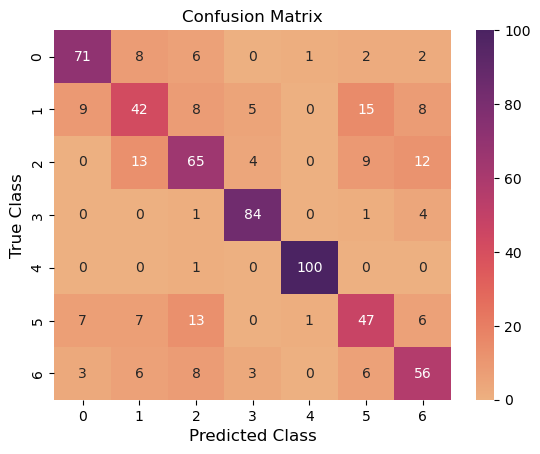

In [13]:
#colour-coding the confusion matrix using a heatmap
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()